In [1]:
!pip install pysoundfile --user
!pip install bitstring --user

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the 'c:\users\dineshkidd\venv\scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the 'c:\users\dineshkidd\venv\scripts\python.exe -m pip install --upgrade pip' command.


#### Using short time Fourier transform to obtain magnitude spectrogram of speech



Short time Fourier transform (STFT) splits signal into small frames ($25$ms), so that consecutive frames are overlapping (below the overlap is $25-10=15$ms). Then, Fourier transform is applied to all frames individually.
Fourier transform gives complex valued outputs. In spectrogram representation of speech only the magnitudes of the complex values are used. Magnitudes can be obtained using NumPy's  (https://www.numpy.org/) ```abs()``` function.

We use Librosa's (https://librosa.github.io/librosa/index.html) STFT implementation.

In [4]:
import IPython
path=(r"sona.wav")
IPython.display.Audio(path)


ValueError: rate must be specified when data is a numpy array or list of audio samples.

Sampling rate: 22050 samples/second
Signal size: 1792058 samples
Signal duration: 81.272 seconds


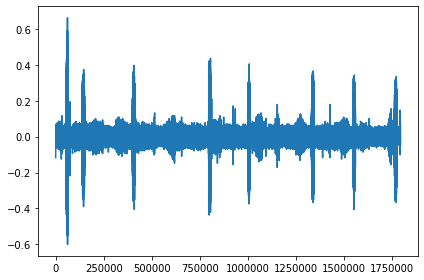

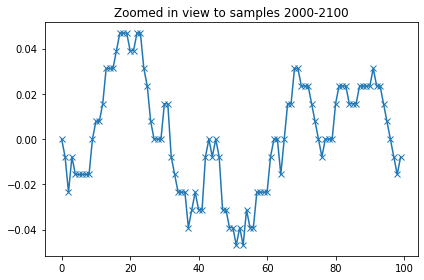

In [19]:
import soundfile
import matplotlib.pyplot as plt
import matplotlib
audio_signal, sampling_rate = soundfile.read(path)
print('Sampling rate: {} samples/second'.format(sampling_rate))
print('Signal size: {} samples'.format(audio_signal.shape[0]))
print('Signal duration: {:.3f} seconds'.format(audio_signal.shape[0] / sampling_rate))
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[2000:2100], marker='x')
plt.title('Zoomed in view to samples 2000-2100')
plt.tight_layout()

In [24]:
import numpy as np
import librosa
from librosa.display import specshow

window_length = int(0.025 * sampling_rate)
hop_length = int(0.01 * sampling_rate)

spectrogram = np.abs(librosa.stft(audio_signal, hop_length=hop_length, win_length=window_length))

# Plotting the spectrogram:
#specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, hop_length=hop_length, y_axis='linear', x_axis='time')
#plt.title('Spectrogram')
#plt.colorbar(format='%+2.0f dB')
#plt.tight_layout()
specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, hop_length=hop_length)
plt.savefig("foo.png")
plt.close()

In [19]:
print(spectrogram.shape)

(1025, 3053)


In [15]:
help(specshow)

Help on function specshow in module librosa.display:

specshow(data, x_coords=None, y_coords=None, x_axis=None, y_axis=None, sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12, ax=None, **kwargs)
    Display a spectrogram/chromagram/cqt/etc.
    
    
    Parameters
    ----------
    data : np.ndarray [shape=(d, n)]
        Matrix to display (e.g., spectrogram)
    
    sr : number > 0 [scalar]
        Sample rate used to determine time scale in x-axis.
    
    hop_length : int > 0 [scalar]
        Hop length, also used to determine time scale in x-axis
    
    x_axis : None or str
    
    y_axis : None or str
        Range for the x- and y-axes.
    
        Valid types are:
    
        - None, 'none', or 'off' : no axis decoration is displayed.
    
        Frequency types:
    
        - 'linear', 'fft', 'hz' : frequency range is determined by
          the FFT window and sampling rate.
        - 'log' : the spectrum is displayed on a log scale.
    